In [1]:
#LP Filter FM Signal

from scipy.signal import butter, lfilter
from scipy.signal import freqs, decimate

def butter_lowpass(cutOff, fs, order=5):
    nyq = 0.5 * fs
    normalCutoff = cutOff / nyq
    b, a = butter(order, normalCutoff, btype='low', analog = True)
    return b, a

def butter_lowpass_filter(data, cutOff, fs, order=4):
    b, a = butter_lowpass(cutOff, fs, order=order)
    print(b,a)
    y = lfilter(b, a, data)
    return y

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

fs = 200000
#load data 

fm_real = np.genfromtxt('fm_signal_real_fs_200kHz.dat')

fm_imag = np.genfromtxt('fm_signal_imag_fs_200kHz.dat')


fm_complex = fm_real + 1j * fm_imag

#Filter 
fm_complex = butter_lowpass_filter(fm_complex, 20000, fs=fs, order = 5)

[0.00032] [1.00000000e+00 6.47213595e-01 2.09442719e-01 4.18885438e-02
 5.17770876e-03 3.20000000e-04]


(-0.1, 0.1)

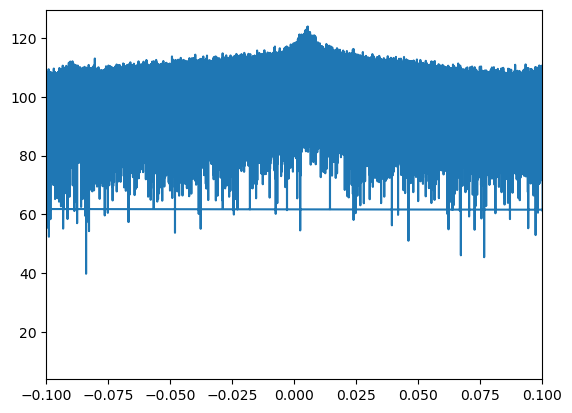

In [ ]:
#Spektrale Analyse

from numpy.fft import fft, fftshift

fm_spec = fft(fm_complex)

delta_f = fs/len(fm_spec)
t = np.arange(len(fm_complex))
freq = np.fft.fftfreq(t.shape[-1])

f_o = freq[np.argmax(20*np.log10(abs(fm_spec)))]*fs

plt.plot(freq, 20*np.log10(abs(fm_spec)))
plt.xlim(-0.1,0.1)



In [ ]:
#Demodulation

signal = np.zeros(len(fm_complex))
last_in = 0 + 1j * 0
for i in range(len(fm_complex)-1):
    signal[i] = np.imag(fm_complex[i]*last_in.conjugate())
    last_in = fm_complex[i]


In [ ]:
# Offset beseitigen

signal_no_offset = signal - 2*np.pi * f_o * 1/fs

In [ ]:
#Save Audio
import scipy.io.wavfile as wav

wav.write('/Users/Davidlohner/Documents/Schaltkreisentwurf/FM_Demodulation/Signal.wav', 200000, y)